In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

import numpy as np
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 50)
#pd.set_option('precision', 5)

In [3]:
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, GridSearchCV,learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor,RandomizedLasso
from sklearn.feature_selection import RFE, f_regression, RFECV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge

In [10]:
os.chdir('/Users/zacklarsen/Dropbox/Inference Analytics Team Folder/Markeza/Datasets/')
!ls *xlsx

Adeel Qureshi - Assessor.xlsx         Int%2FExt Attribute Example (1).xlsx
Axiometrics Trends.xlsx               Rent Zip Map.xlsx
CA_census_by_zip.xlsx                 RentCrawlModel_v2.xlsx
Chuckor_Assessor_Layout_20161103.xlsx Rental Crawl Sample.xlsx


In [26]:
RCM2 = pd.read_csv('RentCrawlModel_v2.csv')
RCM2.head(5)

,Unnamed: 0,Rent,Bedrooms,Bathrooms,Squarefootage,No_Amenities,a/c,affordable,balcony,beautiful,beautifully maintained,brand new,city views,controlled access,conveniently located,covered parking,cozy,duplex,easy access,free rent,freshly painted,garage,gated,gym,hardwood floors,laminate,laundry,loft,low income,luxurious,modern,modern kitchen,move in special,new appliances,new construction,new paint,newly painted,newly renovated,open concept,open floor plan,penthouse,pet friendly,pets allowed,pets welcome,pool,prime location,private owner,private yard,public transit,quiet,remodeled kitchen,reserved parking,section 8,spacious balcony,stainless steel appliances,sunlight,tile floors,upgraded,utilities included,walk score,washer dryer,waterfront views,wheelchair accessible
0,0,1700,2,2,1000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1800,2,2,1000,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2900,2,2,1000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1500,2,2,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,4,1600,2,2,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
Y = RCM2['Rent']

In [27]:
X = RCM2.iloc[:,2:]

In [28]:
scaler = StandardScaler()
scaler.fit(X)
x_s = scaler.transform(X)
x_s

StandardScaler(copy=True, with_mean=True, with_std=True)

array([[ 0.25,  0.94, -0.24, -0.29, ...,  0.  , -0.15, -0.03, -0.07],
       [ 0.25,  0.94, -0.24, -0.29, ...,  0.  , -0.15, -0.03, -0.07],
       [ 0.25,  0.94, -0.24, -0.29, ...,  0.  , -0.15, -0.03, -0.07],
       [ 0.25,  0.94, -0.24, -0.29, ...,  0.  , -0.15, -0.03, -0.07],
       ..., 
       [ 0.25,  0.94, -0.24, -0.29, ...,  0.  , -0.15, -0.03, -0.07],
       [-1.04, -0.74, -0.24,  3.45, ...,  0.  , -0.15, -0.03, -0.07],
       [ 0.25, -0.74, -0.24, -0.29, ...,  0.  , -0.15, -0.03, -0.07],
       [ 0.25, -0.74, -0.24, -0.29, ...,  0.  , -0.15, -0.03, -0.07]])

In [23]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(x_s, Y, test_size=0.33, random_state=42)

In [25]:
# Use Principal Component Analysis to reduce dimensionality
# and improve generalization
pca = decomposition.PCA()
# Use a linear SVR
svm = SVR()
# Combine PCA and SVR to a pipeline
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])
# Check the training time for the SVR
n_components = [5, 10, 15]

params_grid = {
    'svm__C': [1, 10, 100, 1000],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': [0.001, 0.0001],
    'pca__n_components': n_components,
}

estimator = GridSearchCV(pipe, params_grid)
estimator.fit(X_train, y_train)

print (estimator.best_params_, estimator.best_score_)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('svm', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [1, 10, 100, 1000], 'svm__kernel': ['linear', 'rbf'], 'svm__gamma': [0.001, 0.0001], 'pca__n_components': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

{'pca__n_components': 15, 'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'linear'} 0.346639056575


In [32]:
X_train.shape

(959, 61)

In [33]:
y_train.shape

(959,)

In [35]:
X_test.shape

(473, 61)

In [36]:
y_test.shape

(473,)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

0.61884810231455933

0.47656592992733354

0.4765659299273336

(0, 8000)

(0, 8000)

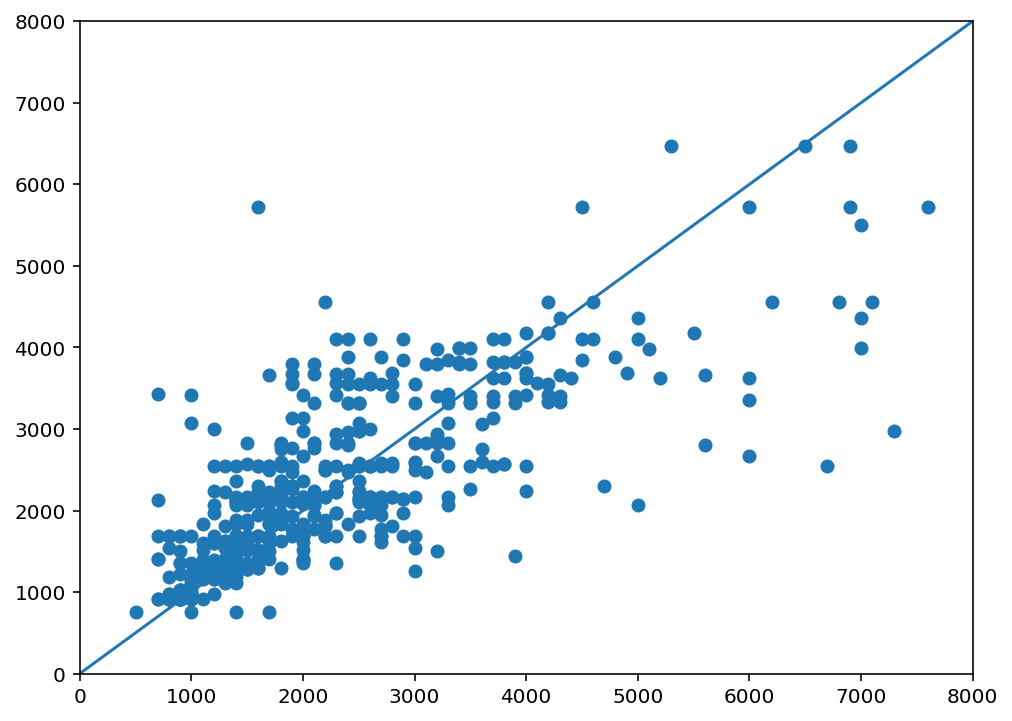

In [41]:
regressor = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=None, 
                                  min_samples_leaf=5, min_samples_split=2, bootstrap=False)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



regressor.score(X_train, y_train)

regressor.score(X_test, y_test)
r2_score(y_test,y_pred) # Equivalent to line above


# Plot the predictions vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=y_pred)
plt.xlim([0,8000])
plt.ylim([0,8000])
plt.plot([0,8000],[0,8000])
plt.show()

## Ridge regression

In [42]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(X_train)
err = p-y_train
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))


# Compute RMSE on test data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))


method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on train: %.4f' %rmse_train) # 1344.6894
print('RMSE on test: %.4f' %rmse_test) # 1107.7593

Method: Ridge Regression
RMSE on train: 1344.6894
RMSE on test: 1107.7593
